# Differences between sampling rates

> this file will be used to look at the QUANTITATIVE differences between the 60Hz sampling rate and the 1Hz

In [78]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# build the filepaths and dataframes
subjects = ["sub-7059", "sub-7058", "sub-7057"]
def insert(sub):
    return f"/mnt/lss/Projects/BOOST/ObservationalStudy/3-experiment/data/act-obs-test/derivatives/GGIR-3.2.6-test-ncp-sleep2/{sub}/accel/output_accel/results/part5_daysummary_MM_L44.8M100.6V428.8_T5A5.csv"
sixty_hz_file = "/mnt/lss/Users/zak/out/output_ggir/results/part5_daysummary_MM_L44.8M100.6V428.8_T5A5.csv"

In [80]:
original_files = []
for sub in subjects:
    original_files.append(insert(sub))
original_files

['/mnt/lss/Projects/BOOST/ObservationalStudy/3-experiment/data/act-obs-test/derivatives/GGIR-3.2.6-test-ncp-sleep2/sub-7059/accel/output_accel/results/part5_daysummary_MM_L44.8M100.6V428.8_T5A5.csv',
 '/mnt/lss/Projects/BOOST/ObservationalStudy/3-experiment/data/act-obs-test/derivatives/GGIR-3.2.6-test-ncp-sleep2/sub-7058/accel/output_accel/results/part5_daysummary_MM_L44.8M100.6V428.8_T5A5.csv',
 '/mnt/lss/Projects/BOOST/ObservationalStudy/3-experiment/data/act-obs-test/derivatives/GGIR-3.2.6-test-ncp-sleep2/sub-7057/accel/output_accel/results/part5_daysummary_MM_L44.8M100.6V428.8_T5A5.csv']

In [81]:
original_dfs = []
for file in original_files:
    df = pd.read_csv(file)
    original_dfs.append(df)

In [82]:
activity_cycles = [
    'dur_spt_sleep_min',
    'dur_day_total_IN_min',
    'dur_day_total_LIG_min',
    'dur_day_total_MOD_min',
    'dur_day_total_VIG_min',
    'ID',
    'calendar_date'
]
if original_dfs:
    original_dfs = [df[activity_cycles] for df in original_dfs]

In [83]:
new_df = pd.read_csv(sixty_hz_file)
new_df = new_df[new_df['ID'].isin(['sub-7057', 'sub-7058', 'sub-7059'])]
new_df = new_df[activity_cycles]
new_df.reset_index(drop=True)

,dur_spt_sleep_min,dur_day_total_IN_min,dur_day_total_LIG_min,dur_day_total_MOD_min,dur_day_total_VIG_min,ID,calendar_date
0,250.500,914.333,158.167,50.917,0.500,sub-7057,2025-02-17
1,345.667,800.583,123.083,111.500,1.917,sub-7057,2025-02-18
2,301.583,898.833,132.667,74.333,0.750,sub-7057,2025-02-19
3,409.167,738.250,121.667,101.500,0.500,sub-7057,2025-02-20
4,118.000,1029.333,177.583,46.750,0.750,sub-7057,2025-02-21
5,285.750,890.083,122.083,109.417,1.917,sub-7058,2025-02-21
6,470.083,526.833,208.667,135.000,2.667,sub-7058,2025-02-22
7,522.583,620.083,172.667,93.750,1.333,sub-7058,2025-02-23
8,431.083,722.000,136.083,101.000,3.167,sub-7058,2025-02-24
9,418.833,714.833,152.083,119.583,6.167,sub-7058,2025-02-25


In [84]:
new_dfs = []
for eyed in new_df['ID'].unique():
    new_dfs.append(new_df[new_df['ID']==eyed])
for df in new_dfs:
    df = df.reset_index(drop=True)
new_dfs[2].head()

,dur_spt_sleep_min,dur_day_total_IN_min,dur_day_total_LIG_min,dur_day_total_MOD_min,dur_day_total_VIG_min,ID,calendar_date
17,188.667,879.000,147.833,199.500,8.583,sub-7059,2025-02-25
18,358.833,793.750,124.750,151.000,1.333,sub-7059,2025-02-26
19,356.833,697.333,130.667,229.083,16.333,sub-7059,2025-02-27
20,281.667,868.250,134.250,150.167,0.750,sub-7059,2025-02-28
21,460.250,614.917,155.000,167.917,15.417,sub-7059,2025-03-01


In [85]:
for df in original_dfs:
    df['ID'] = df['ID'].str.split('_').str[0]  
original_dfs[0]

,dur_spt_sleep_min,dur_day_total_IN_min,dur_day_total_LIG_min,dur_day_total_MOD_min,dur_day_total_VIG_min,ID,calendar_date
0,271.000,655.250,139.000,200.083,10.000,sub-7059,2025-02-25
1,420.167,727.250,114.250,154.000,1.417,sub-7059,2025-02-26
2,270.917,765.167,114.750,226.583,19.333,sub-7059,2025-02-27
3,369.583,767.167,123.750,148.250,0.917,sub-7059,2025-02-28
4,453.167,618.667,149.500,175.250,17.583,sub-7059,2025-03-01
5,298.583,913.083,127.667,93.667,0.833,sub-7059,2025-03-02
6,353.333,770.667,122.583,139.750,14.917,sub-7059,2025-03-03


In [86]:
# Initialize a list to store the paired and filtered DataFrames
paired_dfs = []

# Iterate through the DataFrames in original_dfs and new_dfs
for orig_df, new_df in zip(original_dfs, new_dfs):
    # Ensure both DataFrames have the required columns
    if 'ID' in orig_df.columns and 'calendar_date' in orig_df.columns and \
       'ID' in new_df.columns and 'calendar_date' in new_df.columns:
        
        # Merge DataFrames on 'ID' to create pairs
        merged_df = pd.merge(orig_df, new_df, on='ID', suffixes=('_orig', '_new'))
        
        # Find common calendar dates
        common_dates = set(orig_df['calendar_date']).intersection(set(new_df['calendar_date']))
        
        # Filter rows where calendar_date is in both DataFrames
        filtered_orig = orig_df[orig_df['calendar_date'].isin(common_dates)].copy()
        filtered_new = new_df[new_df['calendar_date'].isin(common_dates)].copy()
        
        # Store the filtered DataFrames as a pair
        paired_dfs.append((filtered_orig, filtered_new))
    else:
        print(f"Warning: One or both DataFrames lack 'ID' or 'calendar_date' columns")

# Example: Inspect the first pair
if paired_dfs:
    print("First paired original DataFrame:")
    print(paired_dfs[0][0])
    print("\nFirst paired new DataFrame:")
    print(paired_dfs[0][1])

First paired original DataFrame:
Empty DataFrame
Columns: [dur_spt_sleep_min, dur_day_total_IN_min, dur_day_total_LIG_min, dur_day_total_MOD_min, dur_day_total_VIG_min, ID, calendar_date]
Index: []

First paired new DataFrame:
Empty DataFrame
Columns: [dur_spt_sleep_min, dur_day_total_IN_min, dur_day_total_LIG_min, dur_day_total_MOD_min, dur_day_total_VIG_min, ID, calendar_date]
Index: []


In [87]:
def peek(df, name):
    print(f"\n{name} dtypes:\n", df.dtypes)
    print(f"{name} ID sample:", df['ID'].astype(str).head().tolist())
    print(f"{name} date sample:", df['calendar_date'].head().tolist())
    print(f"{name} nunique IDs: {df['ID'].nunique()}, nunique dates: {df['calendar_date'].nunique()}")

for i,(orig_df,new_df) in enumerate(zip(original_dfs,new_dfs),1):
    print(f"\n--- Pair {i} ---")
    peek(orig_df, "orig")
    peek(new_df, "new")
    print("ID overlap size:", len(set(orig_df['ID'].astype(str)) & set(new_df['ID'].astype(str))))



--- Pair 1 ---

orig dtypes:
 dur_spt_sleep_min        float64
dur_day_total_IN_min     float64
dur_day_total_LIG_min    float64
dur_day_total_MOD_min    float64
dur_day_total_VIG_min    float64
ID                        object
calendar_date             object
dtype: object
orig ID sample: ['sub-7059', 'sub-7059', 'sub-7059', 'sub-7059', 'sub-7059']
orig date sample: ['2025-02-25', '2025-02-26', '2025-02-27', '2025-02-28', '2025-03-01']
orig nunique IDs: 1, nunique dates: 7

new dtypes:
 dur_spt_sleep_min        float64
dur_day_total_IN_min     float64
dur_day_total_LIG_min    float64
dur_day_total_MOD_min    float64
dur_day_total_VIG_min    float64
ID                        object
calendar_date             object
dtype: object
new ID sample: ['sub-7057', 'sub-7057', 'sub-7057', 'sub-7057', 'sub-7057']
new date sample: ['2025-02-17', '2025-02-18', '2025-02-19', '2025-02-20', '2025-02-21']
new nunique IDs: 1, nunique dates: 5
ID overlap size: 0

--- Pair 2 ---

orig dtypes:
 dur_spt_sl

In [89]:
import pandas as pd

def _clean(df):
    df = df.copy()
    if 'ID' not in df.columns or 'calendar_date' not in df.columns:
        return None
    df['ID'] = df['ID'].astype(str).str.strip()
    df['calendar_date'] = pd.to_datetime(df['calendar_date'], errors='coerce').dt.normalize()
    return df.dropna(subset=['calendar_date'])

def _overlap_score(o, n):
    # score by per-ID date matches (strongest signal of the right pair)
    common_ids = set(o['ID']) & set(n['ID'])
    if not common_ids:
        return 0
    score = 0
    for cid in list(common_ids):
        od = set(o.loc[o['ID'] == cid, 'calendar_date'])
        nd = set(n.loc[n['ID'] == cid, 'calendar_date'])
        score += len(od & nd)
    # tie-breaker: add small weight for ID overlap size
    score += 0.001 * len(common_ids)
    return score

def pair_and_filter_unordered(original_dfs, new_dfs, verbose=True):
    # clean all upfront
    O = [(_clean(df), i) for i, df in enumerate(original_dfs)]
    N = [(_clean(df), j) for j, df in enumerate(new_dfs)]
    O = [(df,i) for df,i in O if df is not None]
    N = [(df,j) for df,j in N if df is not None]

    used_new = set()
    pairs = []
    for o_df, oi in O:
        # find best matching new_df not yet used
        best = (-1, None, None)  # (score, n_df, nj)
        for n_df, nj in N:
            if nj in used_new:
                continue
            s = _overlap_score(o_df, n_df)
            if s > best[0]:
                best = (s, n_df, nj)

        score, n_df, nj = best
        if score <= 0 or n_df is None:
            if verbose:
                print(f"[warn] No viable match for original_dfs[{oi}] (no ID+date overlap).")
            continue

        used_new.add(nj)

        # inner-join on both keys to enforce alignment
        merged = pd.merge(
            o_df, n_df,
            on=['ID', 'calendar_date'],
            how='inner',
            suffixes=('_orig', '_new')
        )

        if merged.empty and verbose:
            # breadcrumbs to help debug
            id_overlap = set(o_df['ID']) & set(n_df['ID'])
            date_overlap = set(o_df['calendar_date']) & set(n_df['calendar_date'])
            print(f"[info] Matched oi={oi} → nj={nj} (score={score:.3f}) "
                  f"but inner merge empty. ID overlap={len(id_overlap)}, "
                  f"global date overlap={len(date_overlap)}.")

        # split back to two filtered views if you want that API
        filtered_orig = merged[[c for c in merged.columns if c.endswith('_orig')] + ['ID', 'calendar_date']]
        filtered_new  = merged[[c for c in merged.columns if c.endswith('_new')]  + ['ID', 'calendar_date']]
        pairs.append(((oi, filtered_orig), (nj, filtered_new)))

    return pairs

# Usage:
paired_dfs = pair_and_filter_unordered(original_dfs, new_dfs, verbose=True)

# Example inspect:
if paired_dfs:
    (oi, fo), (nj, fn) = paired_dfs[0]
    print(f"Original index {oi} filtered head:\n", fo.head())
    print(f"\nNew index {nj} filtered head:\n", fn.head())


Original index 0 filtered head:
    dur_spt_sleep_min_orig  dur_day_total_IN_min_orig  \
0                 271.000                    655.250   
1                 420.167                    727.250   
2                 270.917                    765.167   
3                 369.583                    767.167   
4                 453.167                    618.667   

   dur_day_total_LIG_min_orig  dur_day_total_MOD_min_orig  \
0                      139.00                     200.083   
1                      114.25                     154.000   
2                      114.75                     226.583   
3                      123.75                     148.250   
4                      149.50                     175.250   

   dur_day_total_VIG_min_orig        ID calendar_date  
0                      10.000  sub-7059    2025-02-25  
1                       1.417  sub-7059    2025-02-26  
2                      19.333  sub-7059    2025-02-27  
3                       0.917  sub-7059

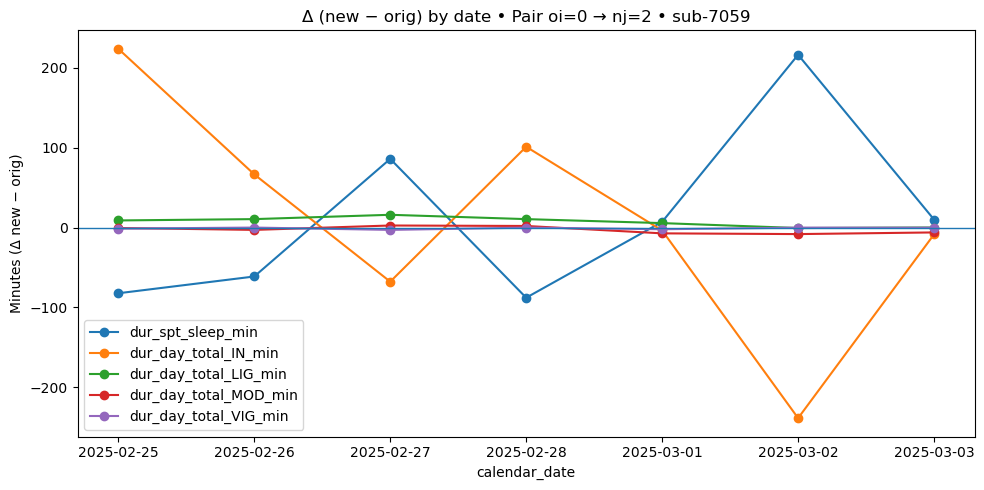

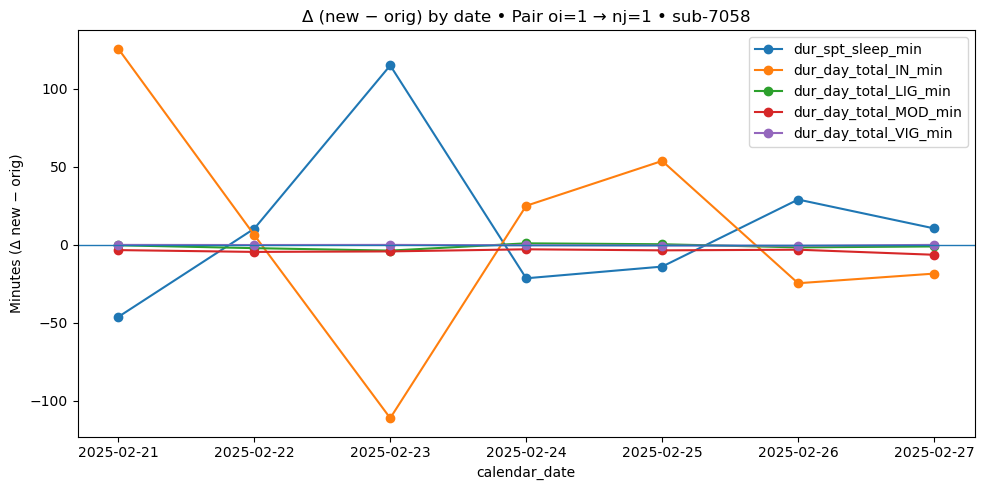

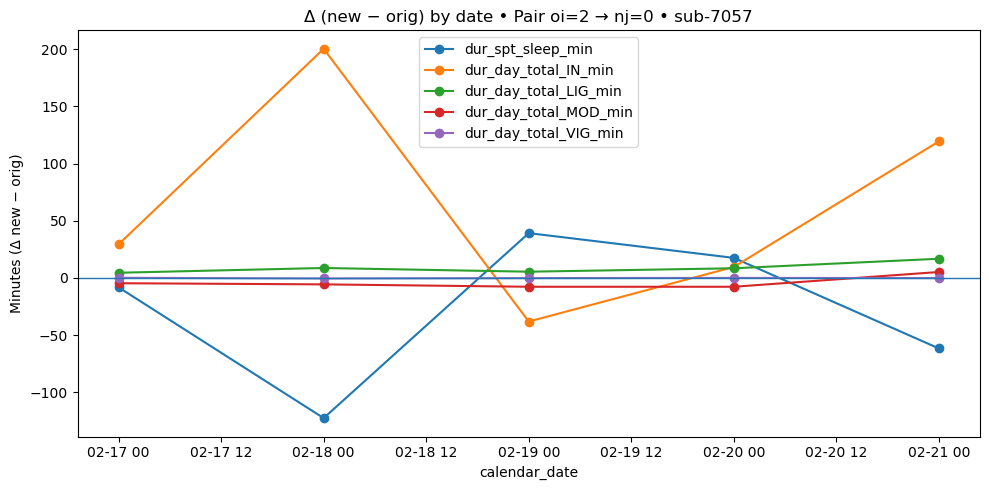

[done] Created 3 plot(s).


In [91]:

# metrics to compare
DUR_COLS = [
    "dur_spt_sleep_min",
    "dur_day_total_IN_min",
    "dur_day_total_LIG_min",
    "dur_day_total_MOD_min",
    "dur_day_total_VIG_min",
]
def plot_dur_differences(pairs, outdir=None, show=True):
    """
    pairs: list of ((orig_idx, filtered_orig_df), (new_idx, filtered_new_df))
           as returned by pair_and_filter_unordered(...)
    outdir: optional directory to save PNGs. If None, files aren't saved.
    show: whether to plt.show() each figure.
    """
    if outdir:
        os.makedirs(outdir, exist_ok=True)

    made = 0
    for (oi, fo), (nj, fn) in pairs:
        if fo.empty or fn.empty:
            print(f"[skip] Empty filtered DataFrame for pair oi={oi}, nj={nj}")
            continue

        # Merge the two filtered views back together on keys
        merged = pd.merge(
            fo, fn,
            on=["ID", "calendar_date"],
            how="inner",
            suffixes=("_orig", "_new")
        )
        if merged.empty:
            print(f"[skip] Inner merge empty for pair oi={oi}, nj={nj}")
            continue

        # Ensure datetime + sort
        merged["calendar_date"] = pd.to_datetime(merged["calendar_date"], errors="coerce")
        merged = merged.dropna(subset=["calendar_date"]).sort_values("calendar_date")

        # Build a tidy delta frame: date index, columns = metrics, values = (new - orig)
        delta = pd.DataFrame({"calendar_date": merged["calendar_date"].values})
        for col in DUR_COLS:
            ocol = f"{col}_orig"
            ncol = f"{col}_new"
            # if a metric is missing on either side, fill with NaN to avoid KeyError
            if ocol not in merged.columns or ncol not in merged.columns:
                delta[col] = pd.NA
            else:
                delta[col] = merged[ncol] - merged[ocol]
        delta = delta.set_index("calendar_date")

        # Figure title bits
        ids = merged["ID"].dropna().unique().tolist()
        id_label = ids[0] if len(ids) == 1 else f"{len(ids)} IDs"
        title = f"Δ (new − orig) by date • Pair oi={oi} → nj={nj} • {id_label}"

        # Plot — one chart per pair, multiple lines (one per metric)
        plt.figure(figsize=(10, 5))
        for col in DUR_COLS:
            if col in delta.columns:
                # Let matplotlib choose default styles/colors; don't specify colors.
                plt.plot(delta.index, delta[col], marker="o", label=col)

        plt.axhline(0, linewidth=1)
        plt.title(title)
        plt.xlabel("calendar_date")
        plt.ylabel("Minutes (Δ new − orig)")
        plt.legend()
        plt.tight_layout()

        # Save if requested
        if outdir:
            # Safe filename: include oi, nj, and (optionally) single ID
            safe_id = ids[0] if len(ids) == 1 else "multi"
            fname = f"pair_{oi}_to_{nj}_{safe_id}.png"
            path = os.path.join(outdir, fname)
            plt.savefig(path, dpi=150)
            print(f"[saved] {path}")

        if show:
            plt.show()
        else:
            plt.close()

        made += 1

    print(f"[done] Created {made} plot(s).")

# Example usage:
plot_dur_differences(paired_dfs, show=True)